Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Reading the data
data=pd.read_csv(r"C:\Users\One\Desktop\Excelr\Assignments\5/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.rename({'R&D Spend':'RD','Administration':'ADM','Marketing Spend':'MKTG'},axis=1,inplace=True)

In [5]:
data.head(2)

,RD,ADM,MKTG,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [6]:
data.duplicated().sum() #No duplicates

0

In [7]:
data.describe() #Statistical information about the data

,RD,ADM,MKTG,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Correlation Analysis

In [8]:
data.corr()

,RD,ADM,MKTG,Profit
RD,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKTG,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


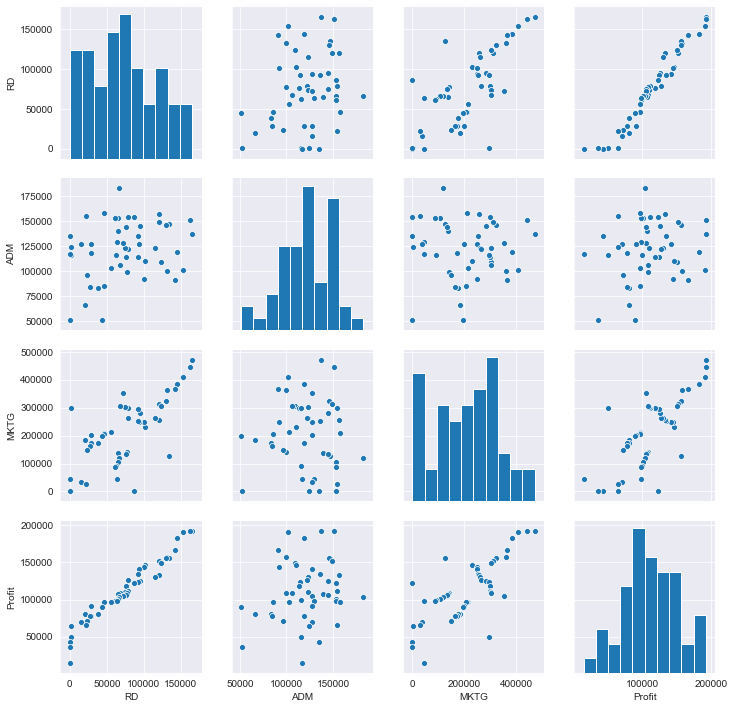

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

## Model Building

In [10]:
model=smf.ols('Profit~RD+ADM+MKTG',data=data).fit()

## Model Testing

In [11]:
#Finding parameters
model.params

Intercept    50122.192990
RD               0.805715
ADM             -0.026816
MKTG             0.027228
dtype: float64

In [12]:
#Finding p values for significance of variable
print(model.tvalues,'/n',round(model.pvalues,5))

Intercept     7.626218
RD           17.846374
ADM          -0.525507
MKTG          1.655077
dtype: float64 /n Intercept    0.00000
RD           0.00000
ADM          0.60176
MKTG         0.10472
dtype: float64


In [13]:
#Finding r^2 values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [14]:
# Build SLR and MLR models for insignificant variables 'ADM' and 'MKTG'
slr_ad=smf.ols('Profit~ADM',data=data).fit()


In [15]:
slr_ad.tvalues , slr_ad.pvalues #ADM Variable is insignificant

(Intercept    3.040044
 ADM          1.419493
 dtype: float64, Intercept    0.003824
 ADM          0.162217
 dtype: float64)

In [16]:
slr_mktg=smf.ols('Profit~MKTG',data=data).fit()

In [17]:
slr_mktg.tvalues , round(slr_mktg.pvalues,5) #MKTG is significant

(Intercept    7.808356
 MKTG         7.802657
 dtype: float64, Intercept    0.0
 MKTG         0.0
 dtype: float64)

In [18]:
model1=smf.ols('Profit~RD+MKTG',data=data).fit() #Building Model with significant variables

In [19]:
model1.tvalues , model1.pvalues

(Intercept    17.463582
 RD           19.265555
 MKTG          1.927052
 dtype: float64, Intercept    3.504062e-22
 RD           6.040433e-24
 MKTG         6.003040e-02
 dtype: float64)

In [20]:
model1.rsquared,model1.rsquared_adj

(0.9504503015559763, 0.9483418037498477)

## Model Validation

In [21]:
# Collineraity check using VIF
# Calculate VIF = 1/(1-Rsquare) for all independent variables

r_sq_rd=smf.ols('RD~ADM+MKTG',data=data).fit().rsquared
vif_r=1/(1-r_sq_rd)

r_sq_adm=smf.ols('ADM~RD+MKTG',data=data).fit().rsquared
vif_adm=1/(1-r_sq_adm)

r_sq_mk=smf.ols('MKTG~ADM+RD',data=data).fit().rsquared
vif_mk=1/(1-r_sq_mk)

Vif_df= pd.DataFrame({'Variables':['RD','ADM','MKTG'],'VIF':[vif_r,vif_adm,vif_mk]})


In [22]:
Vif_df #None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

,Variables,VIF
0,RD,2.468903
1,ADM,1.175091
2,MKTG,2.326773


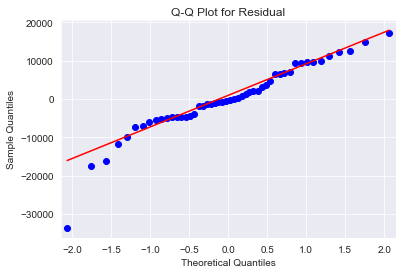

In [23]:
#Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model1.resid,line='q')
plt.title("Q-Q Plot for Residual")
plt.show()

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
np.where(model1.resid<-30000)

(array([49], dtype=int64),)

In [26]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  

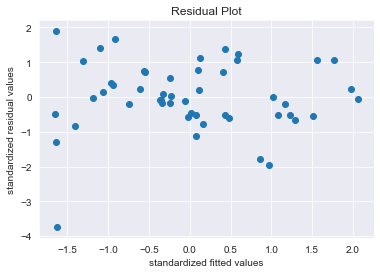

In [27]:
plt.scatter(standard_values(model1.fittedvalues),standard_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

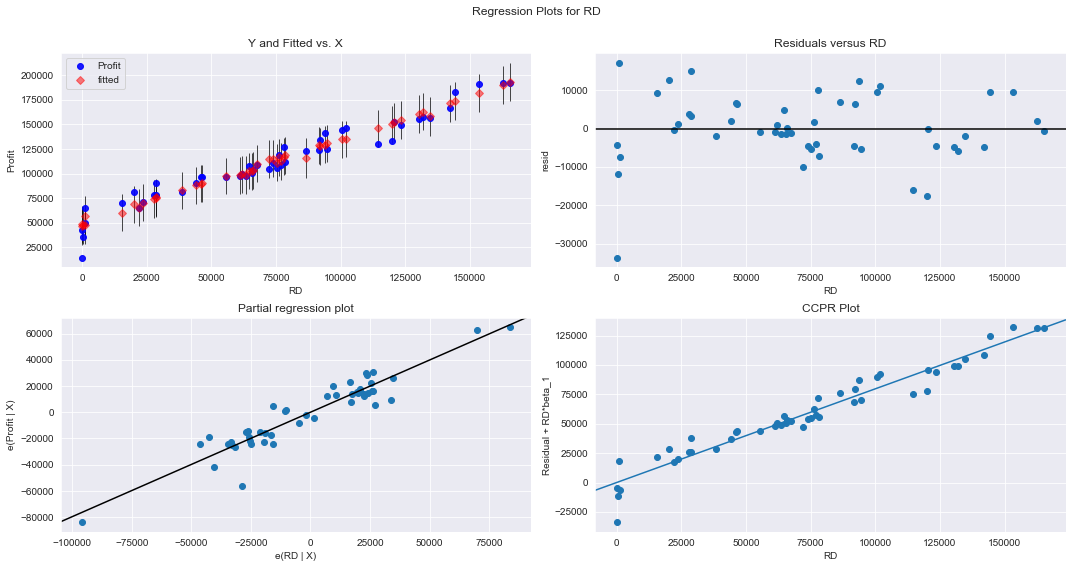

In [28]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'RD',fig=fig)
plt.show()

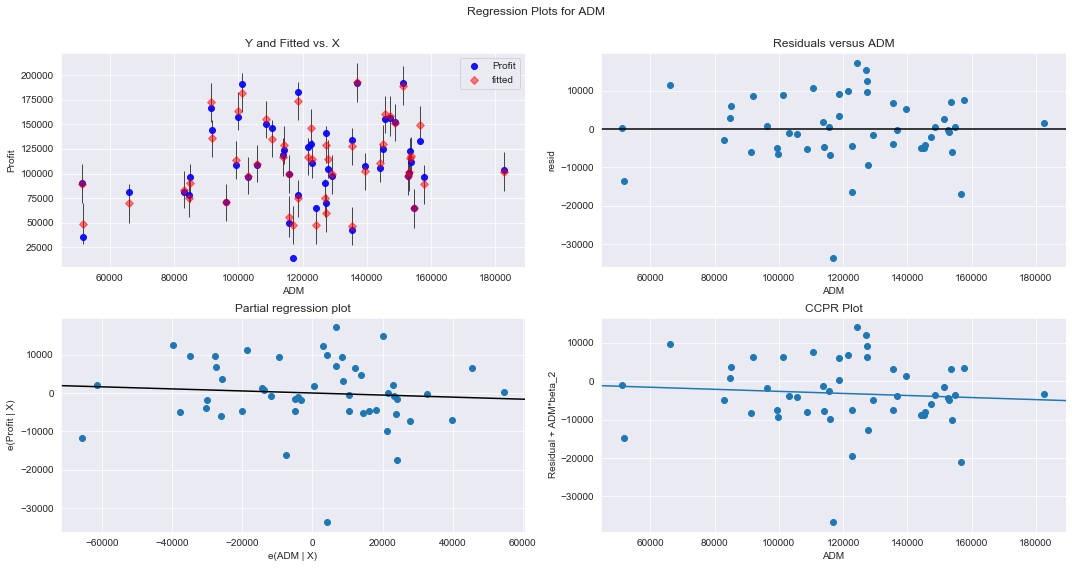

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

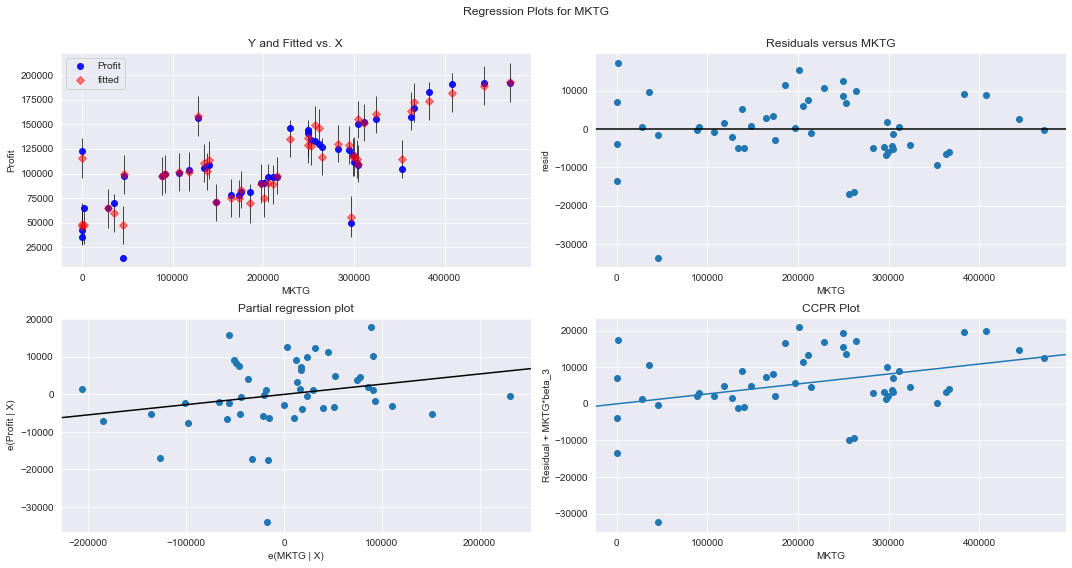

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTG',fig=fig)
plt.show()

## Model Deletion Diagnostic

In [31]:
#Cook Distance for outlier treatment
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

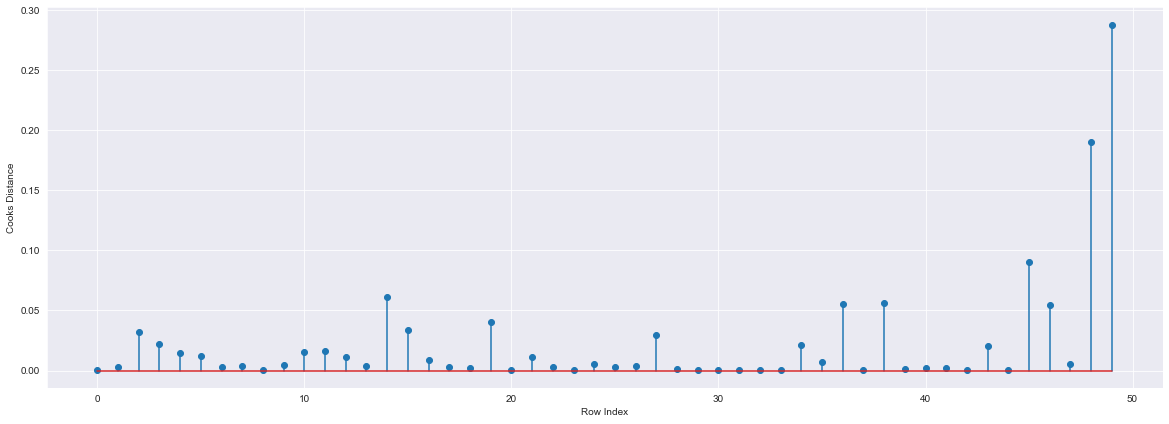

In [32]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

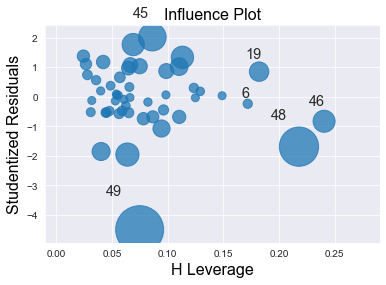

In [34]:
#Leverage value using High Influence Point
influence_plot(model)
plt.show()

In [35]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [36]:
data[data.index.isin([49])]

,RD,ADM,MKTG,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the Model

In [37]:
df=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
df.head()

,RD,ADM,MKTG,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
data.shape

(50, 5)

In [39]:
df.shape

(49, 5)

In [40]:
model2=smf.ols("Profit~RD+ADM+MKTG",data=df).fit()


In [41]:
model2.tvalues,model2.pvalues

(Intercept     9.450782
 RD           20.469501
 ADM          -0.517889
 MKTG          1.825383
 dtype: float64, Intercept    2.960000e-12
 RD           1.971077e-24
 ADM          6.070728e-01
 MKTG         7.458443e-02
 dtype: float64)

In [47]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD+ADM+MKTG",data=df).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df
    else:
        final_model=smf.ols("Profit~RD+ADM+MKTG",data=df).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improved to 0.9858356627471712
Thus model accuracy is improve

In [48]:
final_model.rsquared

0.9882757054424702

In [50]:
df.shape

(27, 5)

## Model Prediction

In [53]:
new_data=pd.DataFrame({'RD':85000,"ADM":120000,"MKTG":180000},index=[0]) #Prdiction using new data point
new_data

,RD,ADM,MKTG
0,85000,120000,180000


In [54]:
final_model.predict(new_data)

0    117920.899812
dtype: float64

## Table containing R Suared value of different model

In [59]:
table=pd.DataFrame({'Model Name':['Model 1','Model 2','Final Model'],'R Squared value':[model.rsquared,model1.rsquared,final_model.rsquared]})

In [60]:
table

,Model Name,R Squared value
0,Model 1,0.950746
1,Model 2,0.950450
2,Final Model,0.988276
